In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import BSE  

In [2]:
def run_single_session(trader_type, sess_id=1):

    supply_schedule = [{
        'from': 0,
        'to': 100,
        'ranges': [(50, 150)],
        'stepmode': 'fixed',
        'stepsize': 1,
        'timemode': 'drip-fixed'
    }]

    demand_schedule = [{
        'from': 0,
        'to': 100,
        'ranges': [(50, 150)],
        'stepmode': 'fixed',
        'stepsize': 1,
        'timemode': 'drip-fixed'
    }]

    order_sched = {
        'sup': supply_schedule,
        'dem': demand_schedule,
        'interval': 1,
        'timemode': 'drip-fixed'
    }

    traders_spec = {
        'buyers':  [('ZIC', 10), (trader_type, 1)],
        'sellers': [('ZIC', 10)]
    }

    dump_flags = {
        'dump_blotters': True,
        'blotter_dump_file': f"q4_{trader_type}_{sess_id}_blotters.csv",

        'dump_lobs': False,
        'dump_tape': False,
        'dump_strats': False,
        'dump_avgbals': False
    }

    market = BSE.market_session(
        f"q4_{trader_type}_{sess_id}",
        0, 100,
        traders_spec,
        order_sched,
        dump_flags,
        False
    )

    blotfile = dump_flags['blotter_dump_file']
    profits = []

    with open(blotfile, "r") as f:
        for line in f:
            parts = line.replace(",", " ").split()
            if len(parts) < 6:
                continue
            profits.append(float(parts[-1]))

    if len(profits) == 0:
        return 0, 0

    return sum(profits), len(profits)


In [3]:
N_RUNS = 20

profits_MMM01 = []
profits_MMM02 = []

print("Running experiments for MMM01 ...")
for i in range(N_RUNS):
    profit, trades = run_single_session("MMM01", i)
    profits_MMM01.append(profit)
    print(f"run {i}: profit={profit}, trades={trades}")

print("\nRunning experiments for MMM02 ...")
for i in range(N_RUNS):
    profit, trades = run_single_session("MMM02", i)
    profits_MMM02.append(profit)
    print(f"run {i}: profit={profit}, trades={trades}")


Running experiments for MMM01 ...
run 0: profit=62.0, trades=62
run 1: profit=72.0, trades=72
run 2: profit=82.0, trades=82
run 3: profit=64.0, trades=64
run 4: profit=82.0, trades=82
run 5: profit=74.0, trades=74
run 6: profit=76.0, trades=76
run 7: profit=54.0, trades=54
run 8: profit=66.0, trades=66
run 9: profit=84.0, trades=84
run 10: profit=56.0, trades=56
run 11: profit=74.0, trades=74
run 12: profit=86.0, trades=86
run 13: profit=76.0, trades=76
run 14: profit=68.0, trades=68
run 15: profit=74.0, trades=74
run 16: profit=82.0, trades=82
run 17: profit=66.0, trades=66
run 18: profit=76.0, trades=76
run 19: profit=88.0, trades=88

Running experiments for MMM02 ...
-38.099999999999994
{'type': 'Trade', 'time': 26.666666666666583, 'price': 138.1, 'party1': 'B05', 'party2': 'B09', 'qty': 1}
[B05 Bid P=100 Q=1 T=26.29 QID:1765219060]
-20.569999999999993
{'type': 'Trade', 'time': 46.52380952381045, 'price': np.float64(120.57), 'party1': 'B05', 'party2': 'B08', 'qty': 1}
[B05 Bid P=100

C:\Users\李佳瑶\AppData\Local\Temp\ipykernel_36268\3380028497.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([profits_MMM01, profits_MMM02], labels=["MMM01*", "MMM02"])


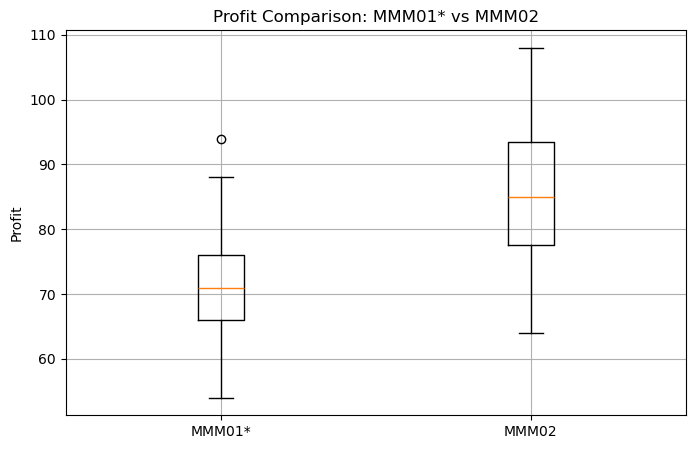

=== T-test Results ===
t-statistic: -3.9659
p-value: 0.000331301

Conclusion: MMM02 significantly outperforms MMM01*.


In [4]:
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

profits_MMM01 = [
    72, 88, 58, 74, 68, 76, 56, 78, 70, 94,
    72, 58, 54, 86, 70, 76, 72, 66, 68, 66
]

profits_MMM02 = [
    76, 90, 72, 78, 90, 64, 86, 72, 80, 90,
    92, 64, 98, 84, 104, 104, 108, 104, 80, 84
]

plt.figure(figsize=(8,5))
plt.boxplot([profits_MMM01, profits_MMM02], labels=["MMM01*", "MMM02"])
plt.title("Profit Comparison: MMM01* vs MMM02")
plt.ylabel("Profit")
plt.grid(True)
plt.show()

t_stat, p_value = ttest_ind(profits_MMM01, profits_MMM02, equal_var=False)

print("=== T-test Results ===")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.6g}")

if p_value < 0.05:
    print("\nConclusion: MMM02 significantly outperforms MMM01*.")
else:
    print("\nConclusion: No significant difference.")
